# Welcome to Deep Learning Workshop 2
In this Workshop, we will be learning about TensorFlow and how to create a deep learning model

To start off, we will need to import tensorflow library

In [0]:
import tensorflow as tf
from tensorflow import keras

In Traditional programming, we use the data given and the rules defined by us to get the desires output.

In Machine learning, we will make use of data and the output of the data to create the rules. We use these rules later to predict the output using the data given. 

![alt text](https://www.bouvet.no/bouvet-deler/6-tips-for-getting-started-with-machine-learning/_/attachment/inline/8469beef-45b3-494b-a68a-2f19948844de:7222f3d165f068511023e7a1e4b817621ae17995/Screen%20Shot%202018-09-20%20at%2009.16.16.png)

### 'Hello World' of Neural Network
Below is a code to create a neural network which predicts y value for the given x value

To get started, we first define a model

In [0]:
model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])

In the above line Sequential defines the simplest model which constitutes of linear stack of layers. In our example, we have only one layer (Dense layer)

In the dense layer, we have units=1 which means there is only one neuron and input_shape = [1] which means it intakes only one value.

In [0]:
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

Compile defines loss function and optimizer function which is used while training the model

In [0]:
import numpy as np
x = np.array([-2,-1,0,1,2,3,4], dtype = 'float')
y = np.array([-3,-1,1,3,5,7,9], dtype = 'float')

model.fit(x, y, epochs = 75) # the model is trained over 20 epochs using x and y  

Epoch 1/75
1/1 [==============================] - 0s 1ms/step - loss: 26.3868
Epoch 2/75
1/1 [==============================] - 0s 1ms/step - loss: 21.1817
Epoch 3/75
1/1 [==============================] - 0s 1ms/step - loss: 17.0087
Epoch 4/75
1/1 [==============================] - 0s 2ms/step - loss: 13.6630
Epoch 5/75
1/1 [==============================] - 0s 2ms/step - loss: 10.9805
Epoch 6/75
1/1 [==============================] - 0s 2ms/step - loss: 8.8294
Epoch 7/75
1/1 [==============================] - 0s 2ms/step - loss: 7.1045
Epoch 8/75
1/1 [==============================] - 0s 2ms/step - loss: 5.7210
Epoch 9/75
1/1 [==============================] - 0s 2ms/step - loss: 4.6114
Epoch 10/75
1/1 [==============================] - 0s 1ms/step - loss: 3.7212
Epoch 11/75
1/1 [==============================] - 0s 2ms/step - loss: 3.0069
Epoch 12/75
1/1 [==============================] - 0s 2ms/step - loss: 2.4337
Epoch 13/75
1/1 [==============================] - 0s 2ms/step - los

As you can observe from the given data, y = 2x + 1. We have now used the data and trained a model using tensorflow. Lets see how accurate are the predictions 

In [0]:
print(model.predict([5])) # y = 2 * 5 + 1 = 11

[[11.024785]]


As you can see from the prediction, we got answer which is very close to the actual answer but its not the same. The reason for this is due to less data provided and the fact that neural networks deal in probability.

### Exercise 1


You are a property agent in Singapore. You have realised that a house in the centre of the city will cost \$5 million and for every kilometer of distance you move away from the house, the price drops by $0.1 million. Create a neural network which predicts cost of the house based on distance from the city.

Hint:
1) use a small scale value(in terms of million)
2) Bigger the dataset, better the prediction
3) In this case, number of epochs will improve your prediction but it leads to overfitting (we will discuss this later in the workshop) 

In [0]:
#create your model
model = # Your Code Here#
model.compile(# Your Code Here#)
xs = # Your Code Here#
ys = # Your Code Here# 
model.fit(# Your Code here#)

SyntaxError: ignored

After creating your model, check your answer with the code given below

In [0]:
print(model.predict([0.0]))
print(model.predict([10.0]))
print(model.predict([15.0]))


## Computer Vision using Neural Networks
In this part of the workshop, we will be working on fashion_mnist dataset which consists of images of 10 items.

In [0]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(len(training_images))
print(len(test_images))

60000
10000


2
(28, 28)


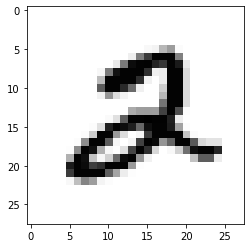

In [0]:
import matplotlib.pyplot as plt
image_index = 5 # You may select anything up to 60,000
print(training_labels[image_index]) # The label is 8
print(training_images[image_index].shape) # The image is 28 x 28 pixels
plt.imshow(training_images[image_index], cmap='Greys')

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation = 'relu'),
                            tf.keras.layers.Dense(10, activation = 'softmax')])

While creating this model, we use a Flatten layer to take the matrice as an input and make it into an 1D list. This 1D list then goes through a neural network whose first layer has 128 nodes and second layer has 10 nodes.

We have come across a new term called activation. It helps us define an activation function which is applied to the output of a neural network layer, which is then passed as the input to the next layer. There are several types of activation functions:
 - relu - if input x > 0 return x, else return 0
 - softmax - takes a set of values and picks the biggest value. eg - input [1,2,1,5,8,3,4,6,3] , output = [0,0,0,0,1,0,0,0,0]
 - sigmoid - returns 1/(1+exp(-x)) - used in binary classification
 - tanh - returns tan(x)
 - linear - returns m*x + c where m and c are weights changed while fitting the model
 - exponential - returns exp(x)
 - softplus - returns log(exp(x)+1)
 - softsign - returns x/(abs(x)+1)

 For this workshop, we will be using only relu, softmax and sigmoid.



We will be using adam as the optimizer. There are different types of optimizers which can be beneficial in different scenarios. Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks. 

The learning rate rate of your optimizer changes over time

In [0]:
adam = keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model.compile(optimizer = adam,
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

The amount that the weights are updated during training is referred to as the step size or the “learning rate.” If the value is too high, it will lead to over-fitting and if its too low, it will take more epochs to train the model.

In the statement, we are fitting the model using only are training imafes and training labels. We are going to run it through 3 epochs and see the results

In [0]:
model.fit(training_images, training_labels, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3548 - accuracy: 0.8529
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3873 - accuracy: 0.9103
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9323


Let's make prediction using our test set to check if the predictions are correct. We can see that when we get the prediction for an image from a model, it returns a list of float numbers. These numbers signify the probability of the image being that specific category. To find the category, we find the index of the biggest number in the list.



In [0]:
import numpy as np
pred = model.predict(test_images)
print(pred[100])
print(np.argmax(pred[100]))
print(test_labels[100])

[1.0089011e-05 7.6075322e-22 3.0516854e-15 7.7785739e-14 2.5561155e-06
 4.4426611e-06 9.9998271e-01 1.6896574e-07 2.4136115e-08 4.0872804e-13]
6
6


Melody - add the model evaluation part over here

## Convolutional Neural Networks
In this part of the workshop, we will be learning about convolutional layer, pooling layer and how it plays a part in image classification. 

Convolutional layer helps us identify relation between the pixel and its surrounding pixels. 

![alt text](https://lh3.googleusercontent.com/proxy/iSdxLz9L9vYKskgeExM6m0iB8ixxqVQjTYHQ9MekkD01vkhupF6sTy0H4UnzoBJyfq9Bh1CIo-ta4_SwdFGM2XkgFsiw6eHz-Ps_YLYuZhK9GYOfJ-L_hlYbBv_2KQR5G72auQ)

In the example given above, the convolutional layer creates a 3 X 3 filter which is labeled as K. This filter is use on the original image to find the relation between the pixels by applying the filter for every set of of pixel. In this example, the filter is multiplied to the original image pixel and then the values are added to give a new 2D array. Convolutions can be performed multiple times and can have different dimensions to improve the models prediction.






Pooling layer reduce the spatial size of the representation to reduce the amount of parameters and computation in the network. While using the pool layer, we need to make sure that we reduce the size to help in computation without losing important features which will help in classification. 

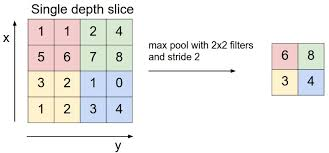

In the example given above, max pooling with 2 x 2 filter is used to find the largest number in 2x2 filter and create a smaller 2D array for computation

For computer vision, we are going to use couple of convolutional and pooling layers to compute the data and then flatten this data into a 1D array. After flattening it, we use dense layer to compute the data and find the image classification. 

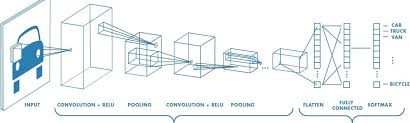

4423680/4422102 [==============================] - 0s 0us/step
5
(28, 28)


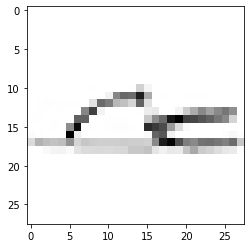

In [0]:
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
print(x_train[image_index].shape) # The image is 28 x 28 pixels
plt.imshow(x_train[image_index], cmap='Greys')

### Exercise 2


Create a convolutional neural network to classify images of the Fashion MNIST dataset.

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples.

Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [0]:
from keras.datasets import fashion_mnist
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#load data from fashion_mnist into sets for training and testing
#YOUR CODE HERE

#assign names to labels
class_names={0:'top', 1:'trouser', 2:'pullover', 3:'dress', 4:'coat', 5:'sandal', 6:'shirt', 7:'sneaker', 8:'bag', 9:'boot'}

#visualize data
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Pre-process data** 

In [0]:
#normalize the images
#YOUR CODE HERE

#reshape the images
#YOUR CODE HERE

**Build model**

In [0]:
model = #YOUR CODE HERE

**Train model**

In [0]:
model.compile(optimizer = adam, loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit("""YOUR CODE HERE""")

**Evaluate perfomance**

In [0]:
loss, acc = #YOUR CODE HERE
print("Training : loss={:.3f} - acc={:.3f}".format(loss, acc))

loss, acc = #YOUR CODE HERE
print("Test : loss={:.3f} - acc={:.3f}".format(loss, acc))

**Improve model**

If you observed over-fitting, improve your model by using regularization

In [0]:
model.add("""YOUR CODE HERE""")

**Re-evaluate performance**

In [0]:
predictions = #YOUR CODE HERE

#visualize predictions 
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap='binary')
    actual_class=class_names[test_labels[i]]
    if predictions[i]==test_labels[i]:
      plt.xlabel(actual_class, color='green')
    else:
      plt.xlabel(actual_class, color='red')
plt.show()
